In [8]:
import sys
import os

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
sns.set_theme(color_codes=True)

# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
revenue_data = open('revenue_data.txt', 'r').readlines()
filtered_reviews_data = open('filtered_reviews.txt', 'r').readlines()
game_prices_data = open('game_prices.txt', 'r').readlines()
game_titles_data = open('game_titles.txt', 'r').readlines()

games = []
revenues = []
filtered_reviews = []
game_prices = []
game_titles = []
free_games = 0
game_count = 0

for i in range(0,len(revenue_data)):
    game_count += 1
    revenue = revenue_data[i].split('\n')[0]
    f_reviews = filtered_reviews_data[i].split('\n')[0]
    game_price = game_prices_data[i].split('\n')[0]
    game_title = game_titles_data[i].split('\n')[0]
    if game_price == '0':
      free_games += 1
    revenues.append(revenue)
    filtered_reviews.append(f_reviews)
    game_prices.append(game_price)
    game_titles.append(game_title)
    
    game = {'name': game_title, 'price': game_price, 'filtered_reviews': f_reviews, 'revenue': revenue}
    games.append(game)

print("Analyzing data from %s games" % game_count)

Analyzing data from 4430 games


In [13]:
raw_data = pd.read_csv('vr_game_data.csv')
paid_game_data = raw_data[(raw_data["Price (USD)"] > 0)]
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

def createLinReg(data, x_idx, y_idx):
    X = data.iloc[:, x_idx].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, y_idx].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    

def showFig(x_label, y_label, title, ylimmax, r_value=None):
    fig, ax = plt.subplots()
    ax.scatter(X, Y)
    ax.set(ylim=([0, ylimmax]))
    plt.ticklabel_format(style = 'plain')
    ax.plot(X, Y_pred, color='red')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    if r_value:
      label='r = %s' % r_value
      plt.legend([label])


print("Fun facts!")
print("~~~~~~~~~~~~")
print("~~~Average revenue for paid games: $%s" % "{:.2f}".format(np.average(paid_game_data.iloc[:, -1])))
percent_free = str(round(free_games / game_count * 100, 2))
print('~~~%s%% of games are free' % percent_free)
print('~~~Title length has no corellation to revenue')

Fun facts!
~~~~~~~~~~~~
~~~Average revenue for paid games: $62620.08
~~~27.36% of games are free
~~~Title length has no corellation to revenue


0.0


Text(0, 0.5, 'Frequency')

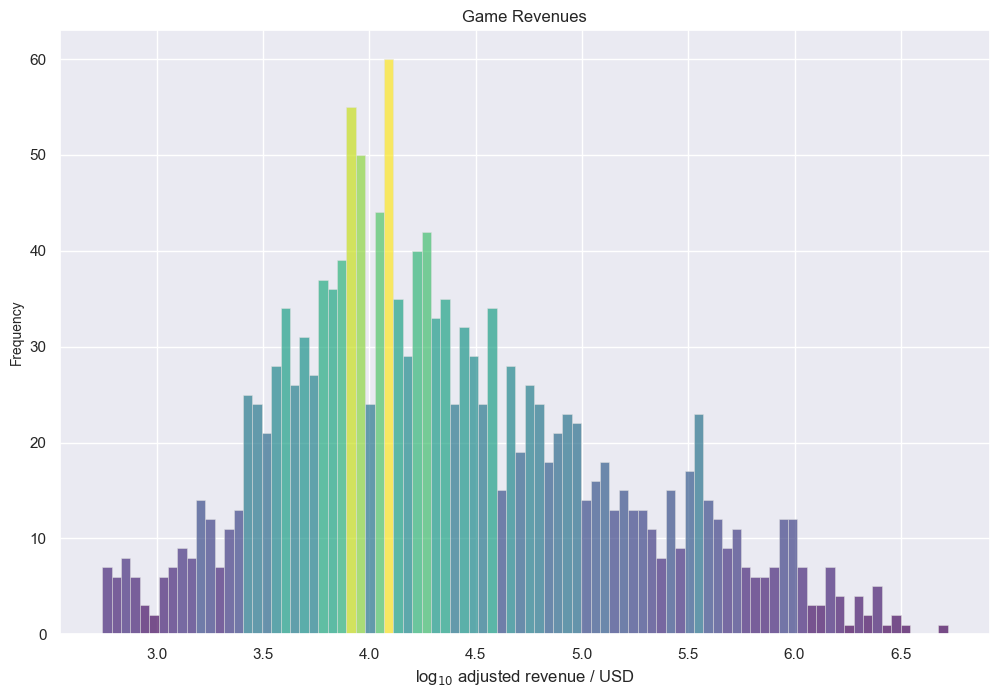

In [14]:
# max(revenue)

print(np.median(paid_game_data['Company Revenue']))
revenue = [np.log10(x) for x in paid_game_data['Company Revenue'] if not x == 0]
x = revenue
n, bins, patches = plt.hist(x, bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

# Make one bin stand out   
# patches[30].set_fc('red') # Set color
# patches[30].set_alpha(1) # Set opacity

# Add annotation
# plt.annotate('Important Bar!', xy=(0.57, 175), xytext=(2, 130), fontsize=15, arrowprops={'width':0.4,'headwidth':7,'color':'#333333'})

# Add title and labels with custom font sizes
plt.title('Game Revenues', fontsize=12)
# plt.xlabel('Log Adjusted Revenue', fontsize=10)
plt.xlabel(r"log$_{10}$ adjusted revenue / USD", fontsize=12)
plt.ylabel('Frequency', fontsize=10)

(-1.1091517171817955,
 1.1154360474873848,
 -1.1145293250301798,
 1.2049258917430425)

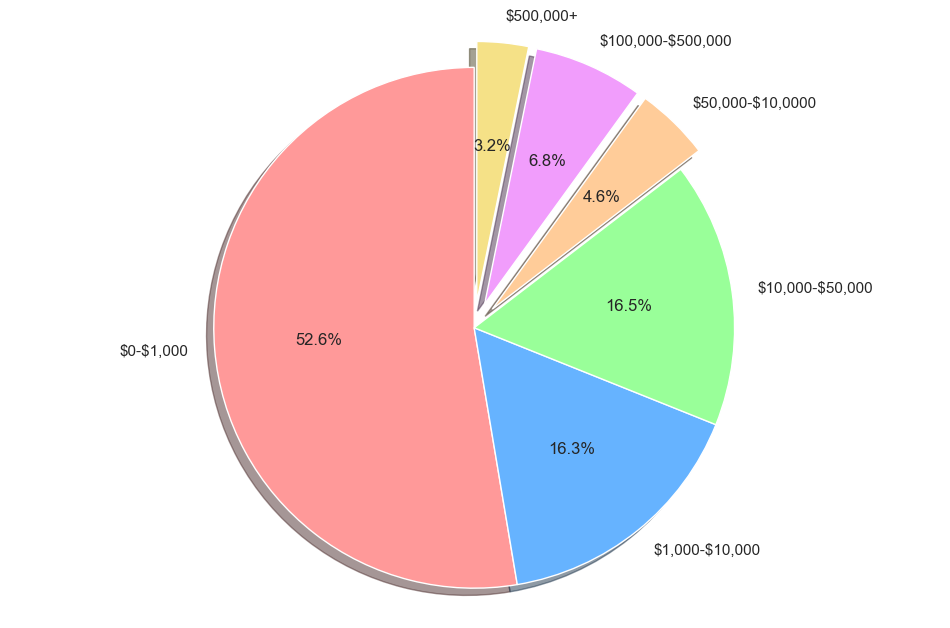

In [15]:
ranges = [[0,1000], [1000,10000], [10000,50000], [50000,100000], [100000,500000], [500000,50000000], [50000000,10000000]]
groupA = 0
groupB = 0
groupC = 0
groupD = 0
groupE = 0
groupF = 0
groupG = 0

for revenue in paid_game_data['Company Revenue']:
    if revenue >= 0 and revenue <= 1000:
        groupA += 1
    if revenue > 1000 and revenue <= 10000:
        groupB += 1
    if revenue > 10000 and revenue <= 50000:
        groupC += 1
    if revenue > 50000 and revenue <= 100000:
        groupD += 1
    if revenue > 100000 and revenue <= 500000:
        groupE += 1
    if revenue > 500000:
        groupF += 1

labels = '\$0-\$1,000', '\$1,000-\$10,000', '\$10,000-\$50,000' , '\$50,000-\$10,0000', '\$100,000-\$500,000', '\$500,000+'
sizes = [52.7, 16.3, 16.5, 4.6, 6.8, 3.2]
explode = (0, 0, 0, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#f19dfc', '#f5e187']

theme = plt.get_cmap('jet')
total = sum(sizes)
fig1, ax1 = plt.subplots()

ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    colors=colors,
    )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()
# 3218

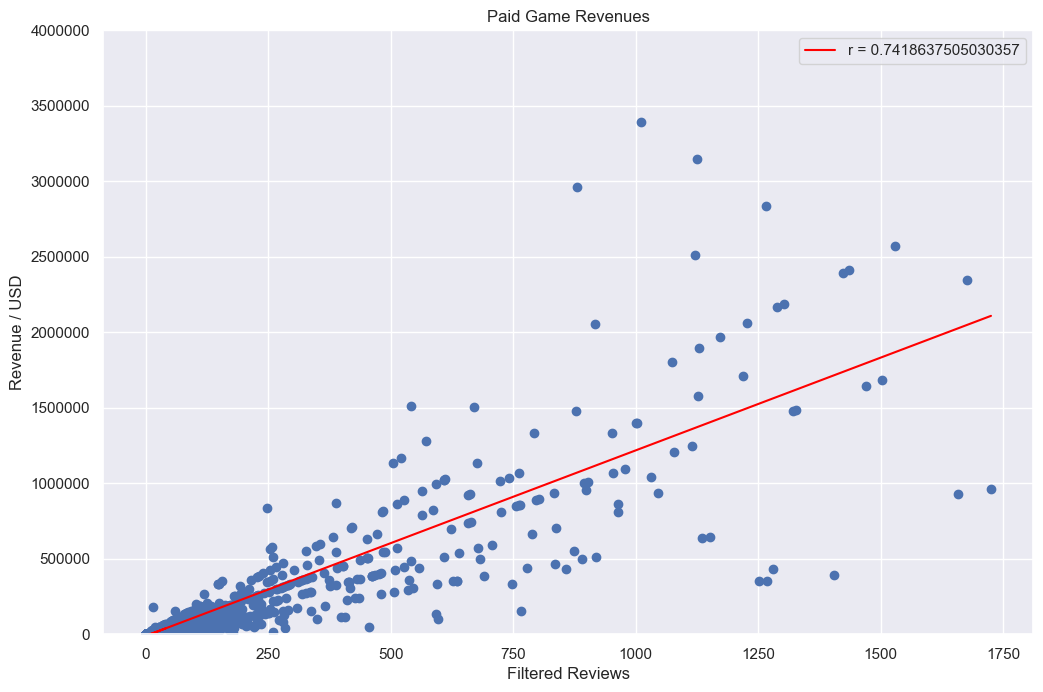

In [16]:
X = paid_game_data.iloc[:, 6].values.reshape(-1, 1) 
Y = paid_game_data.iloc[:, -1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
r_value = linear_regressor.score(X, Y)
showFig('Filtered Reviews', 'Revenue / USD', 'Paid Game Revenues', 4*10**6, r_value)

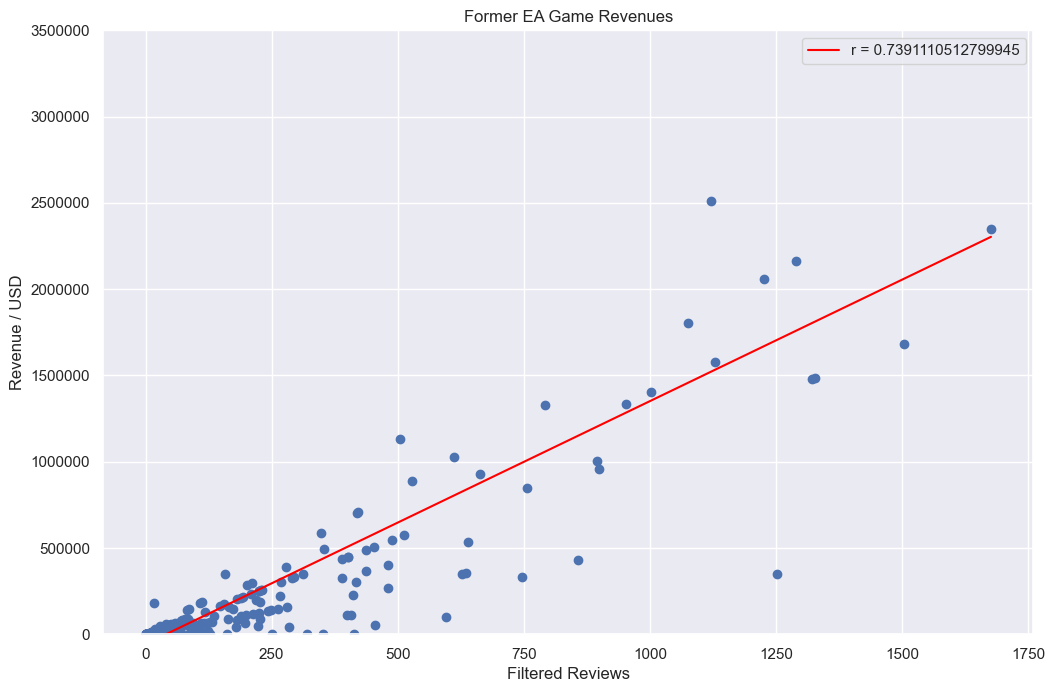

In [17]:
early_access_data = raw_data[(raw_data["Early Access"] == "Former E.A.")]
# print(len(early_access_data))
# createLinReg(early_access_data, 6, -1)
X = early_access_data.iloc[:, 6].values.reshape(-1, 1)
Y = early_access_data.iloc[:, -1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
r_value = linear_regressor.score(X, Y)
Y_pred = linear_regressor.predict(X)

showFig('Filtered Reviews', 'Revenue / USD', 'Former EA Game Revenues', 3.5*10**6, r_value)

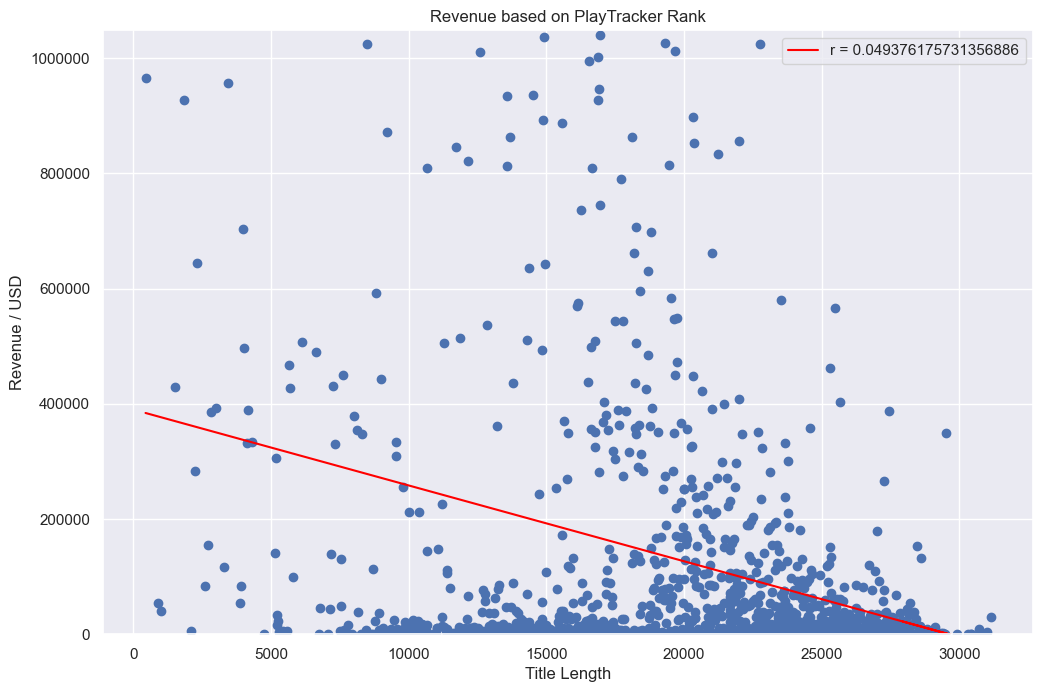

In [18]:
# Revenue based on PlayTrackerRank
# print(paid_game_data.keys())
na_omitted_paid_game_data = paid_game_data[paid_game_data['PlayTracker rank'].notna()]


def diffLim(x_label, y_label, title, r_value=None):
    fig, ax = plt.subplots()
    ax.scatter(X, Y)
    plt.ticklabel_format(style = 'plain')
    ax.plot(X, Y_pred, color='red')
    # ax.set(xlim=([0, 60]))
    ax.set(ylim=([0, 4**10^6]))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    if r_value:
      label='r = %s' % r_value
      plt.legend([label])

X = na_omitted_paid_game_data.iloc[:, 10].values.reshape(-1, 1)
Y = na_omitted_paid_game_data.iloc[:, -1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
r_value = linear_regressor.score(X, Y)
Y_pred = linear_regressor.predict(X)


diffLim('Title Length', 'Revenue / USD', 'Revenue based on PlayTracker Rank', r_value)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


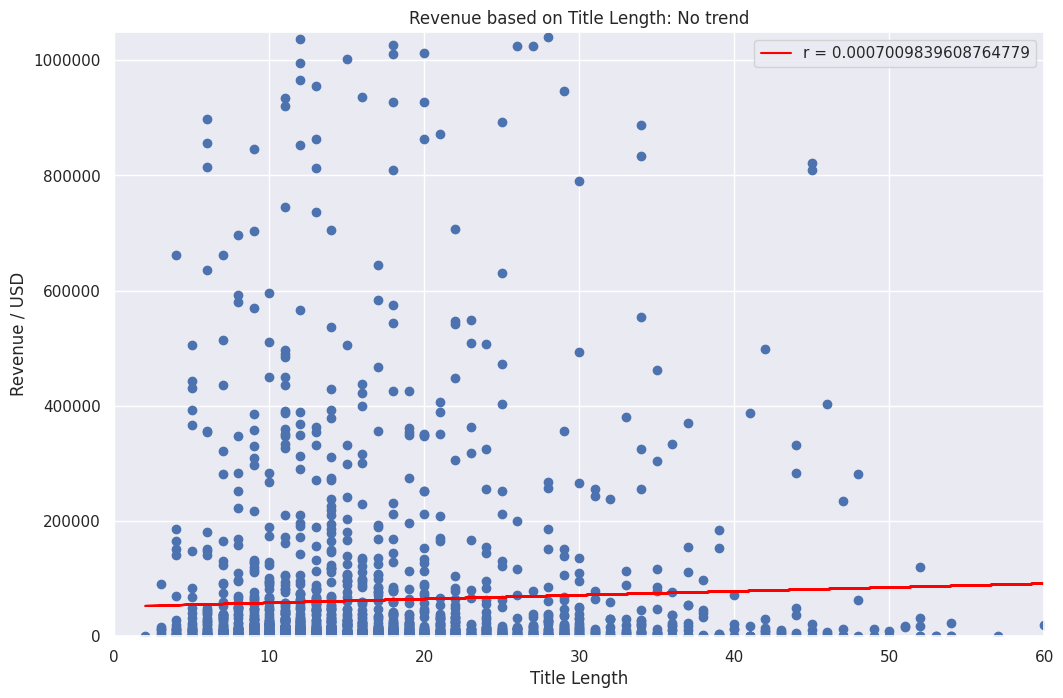

In [ ]:
# Revenue based on Title Length: No trend found
title_length_data = paid_game_data

def noLim(x_label, y_label, title, r_value=None):
    fig, ax = plt.subplots()
    ax.scatter(X, Y)
    plt.ticklabel_format(style = 'plain')
    ax.plot(X, Y_pred, color='red')
    ax.set(xlim=([0, 60]))
    ax.set(ylim=([0, 4**10^6]))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    if r_value:
      label='r = %s' % r_value
      plt.legend([label])

c = 0
title_lengths = []
for index, row in title_length_data.iterrows():
      title_lengths.append(len(row['Title']))

title_length_data['Title Lengths'] = title_lengths

X = paid_game_data.iloc[:, -1].values.reshape(-1, 1)
Y = paid_game_data.iloc[:, -2].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
r_value = linear_regressor.score(X, Y)
Y_pred = linear_regressor.predict(X)

noLim('Title Length', 'Revenue / USD', 'Revenue based on Title Length: No trend', r_value)
    

In [ ]:
# TODO: Get metrics on team size and budget if possible